#### task: Determining the weak areas that make the least profit


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Downloads\SampleSuperstore.csv")

### cleaning data


In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [11]:
df.shape

(9994, 13)

In [3]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(9977, 13)

In [17]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:

df[['Sales','Quantity','Profit']].describe()

,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


In [6]:
df['Profit'].sort_values(ascending=True).head(10)

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
3151   -2639.9912
5310   -2287.7820
9639   -1862.3124
1199   -1850.9464
2697   -1811.0784
Name: Profit, dtype: float64

In [4]:
n_profit=df[df['Profit']<0]
n_profit[['Region','State','City','Category','Sub-Category','Profit']].sort_values(by='Profit',ascending=True)



,Region,State,City,Category,Sub-Category,Profit
7772,East,Ohio,Lancaster,Technology,Machines,-6599.9780
683,South,North Carolina,Burlington,Technology,Machines,-3839.9904
9774,Central,Texas,San Antonio,Office Supplies,Binders,-3701.8928
3011,West,Colorado,Louisville,Technology,Machines,-3399.9800
4991,Central,Illinois,Chicago,Office Supplies,Binders,-2929.4845
...,...,...,...,...,...,...
4660,East,Pennsylvania,Philadelphia,Technology,Accessories,-0.3444
7413,West,Oregon,Tigard,Furniture,Furnishings,-0.3398
1566,Central,Texas,Allen,Technology,Accessories,-0.2685
1496,Central,Texas,Coppell,Office Supplies,Storage,-0.2098


##### The top ten cities making the least profit

Text(0.5, 1.0, 'The top ten cities making the least profit')

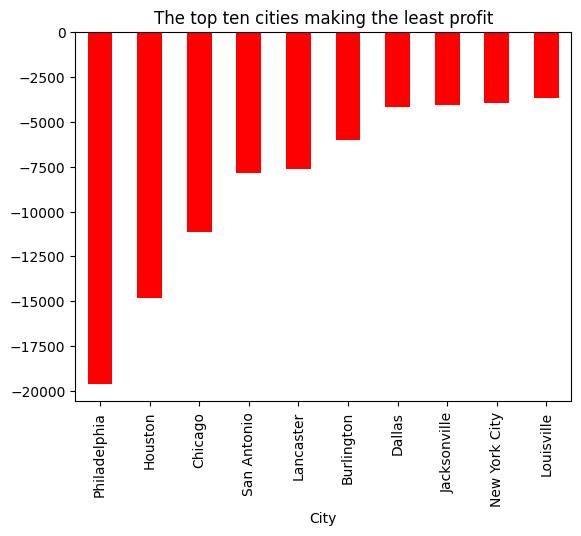

In [31]:
n_profit.groupby(['City'])['Profit'].sum().sort_values(ascending=True)[:10].plot.bar(color='red')
plt.title('The top ten cities making the least profit')

Text(0.5, 1.0, 'The regions that make the least profit')

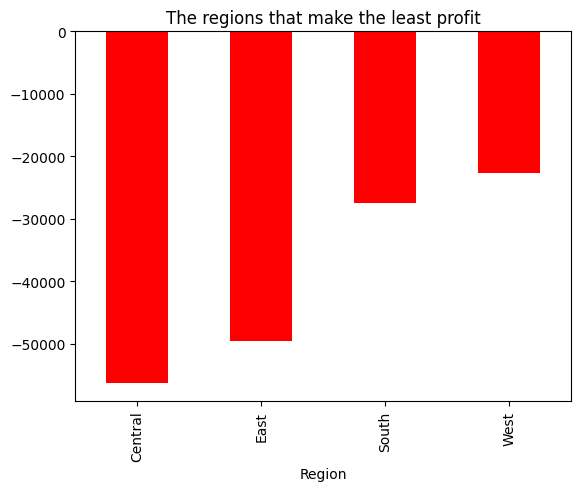

In [32]:
n_profit.groupby(['Region'])['Profit'].sum().sort_values(ascending=True).plot.bar(color='red')
plt.title('The regions that make the least profit')

##### Find out which category has the highest profit.

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Profit By category')

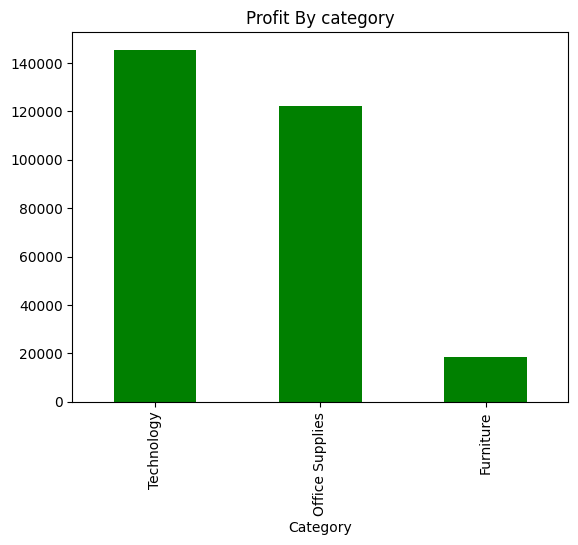

In [31]:

df.groupby(['Category'])['Profit'].sum().sort_values(ascending=False).plot.bar(color='green')

plt.title('Profit By category')

Text(0.5, 1.0, 'Profit By Sub-category')

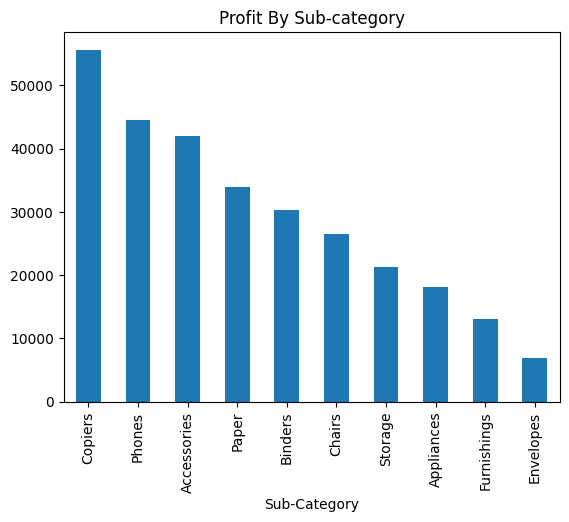

In [48]:
df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)[:10].plot.bar()
plt.title('Profit By Sub-category')
